## Objective
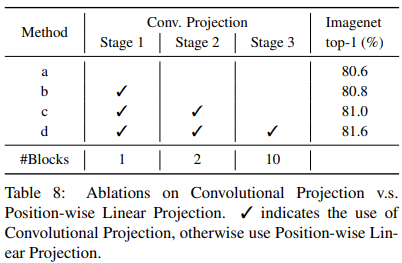

This page shows an experiment **comparing Convolutional Projections used in CvT and Linear Projections used in ViT**. The CvT consists of three stages, with Convolutinoal Projection used once for each stage. Therefore, we compare the effectiveness of the two projections by alternately using Convolutional Projection and Linear Projection in each stage.

The CvT network takes about 20 hours to train ImageNet 1k by 1 epoch. Therefore, due to the limitations of time cost and computing power, training and validation were conducted with ImageNet's subset, Imagenette2.

## Data Download

 - Download ImageNet Dataset to colab via fastai

 - [Reference]

  https://github.com/fastai/imagenette

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
cd /content/drive/MyDrive/FinalProject/CvT-main/DATASET/imagenette2

/content/drive/MyDrive/FinalProject/CvT-main/DATASET/imagenette2


In [ ]:
# Downloaded the imagenet subset from fastai 
# And Unzip

!tar -xvzf imagenette2.tgz

## Setup Environment

In [1]:
cd '/content/drive/MyDrive/FinalProject/CvT-main/'

/content/drive/MyDrive/FinalProject/CvT-main


In [2]:
# Install the same pytorch as the paper
# !pip install torch==1.7.1 torchvision==0.8.2 torchaudio==0.7.2 

# Install a environment with 'requirement.txt' attached to the paper
!python -m pip install -r requirements.txt --user -q 

# Required for code operation but omitting in the paper
!pip install -U PyYAML

In [7]:
import sys

sys.path.append('/content/drive/MyDrive/FinalProject/CvT-main')
sys.path.append('/content/drive/MyDrive/FinalProject/CvT-main/lib')
sys.path.append('/content/drive/MyDrive/FinalProject/CvT-main/lib/tools')
sys.path.append('/root/.local/lib/python3.7/site-packages')

## Make Differnt Config File
 

---

　　　　　　　&nbsp;&nbsp;**stage1**&nbsp;&nbsp;**stage2**&nbsp;&nbsp;**stage3**
 - **Method A**: [ linear ] [ linear ] [ linear ]
 - **Method B**: [  Conv ] [ linear ] [ linear ]
 - **Method C**: [ Conv ] [ Conv ] [ linear ]
 - **Method D**: [ linear ] [ linear ] [ linear ]

In [ ]:
cd '/content/drive/MyDrive/FinalProject/CvT-main/experiments'

/content/drive/MyDrive/FinalProject/CvT-main/experiments


In [ ]:
!mkdir -p imagenette2/cvt

In [ ]:
!cp imagenette2/cvt/cvt-13-224x224-method-d.yaml imagenette2/cvt/cvt-13-224x224-method-a-proj.yaml
!cp imagenette2/cvt/cvt-13-224x224-method-d.yaml imagenette2/cvt/cvt-13-224x224-method-b-proj.yaml
!cp imagenette2/cvt/cvt-13-224x224-method-d.yaml imagenette2/cvt/cvt-13-224x224-method-c-proj.yaml
!cp imagenette2/cvt/cvt-13-224x224-method-d.yaml imagenette2/cvt/cvt-13-224x224-method-d-proj.yaml

# And then change parameters related to projection

## Method A
The parameter were changed as follows.
  - DATASET.DATASET: imagenette2
  - DATASET.ROOT: DATASET/imagenette2/imagenette2
  - MODEL.SPEC.QKV_PROJ_METHOD: ['linear', 'linear', 'linear']
  - TRAIN.BATCH_SIZE_PER_GPU: 64
  - TRAIN.END_EPOCH: 20 

### Train


---


 - Error
```python
UnboundLocalError: local variable 'q' referenced before assignment
```
 - Solution  
 In `lib/models/cls_cvt.py`, change the code as follows.
 ```python
        # if (
        #     self.conv_proj_q is not None
        #     or self.conv_proj_k is not None
        #     or self.conv_proj_v is not None
        # ):
        q, k, v = self.forward_conv(x, h, w)

        q = rearrange(self.proj_q(q), 'b t (h d) -> b h t d', h=self.num_heads)
 ```


---

 - Error
 ```python
  CUDA error: no kernel image is available for execution on the device
```

 - Solution
 


In [3]:
cd /content/drive/MyDrive/FinalProject/CvT-main

/content/drive/MyDrive/FinalProject/CvT-main


In [10]:
# Convert shell file written in window to shell file compatible with linux
# See https://isuetracker.tistory.com/770
!sed -ie 's/\r$//' run.sh 

# Train 
!bash run.sh -g 1 -t train --cfg experiments/imagenette2/cvt/cvt-13-224x224-method-a-proj.yaml

job type: train
rank: 0
node count: 1
master addr: 127.0.0.1
=> merge config from experiments/imagenette2/cvt/cvt-13-224x224-method-d-d.yaml
=> creating OUTPUT ...
=> creating OUTPUT/imagenette2/cvt-13-224x224-method-d-d ...
=> setup logger ...
2022-05-19 06:12:36,091:[P:4631]:Rank[0/1] => collecting env info (might take some time)
2022-05-19 06:12:37,527:[P:4631]:Rank[0/1] 
PyTorch version: 1.7.1
Is debug build: False
CUDA used to build PyTorch: 10.2
ROCM used to build PyTorch: N/A

OS: Ubuntu 18.04.5 LTS (x86_64)
GCC version: (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Clang version: 6.0.0-1ubuntu2 (tags/RELEASE_600/final)
CMake version: version 3.22.4

Python version: 3.7 (64-bit runtime)
Is CUDA available: True
CUDA runtime version: Could not collect
GPU models and configuration: GPU 0: A100-SXM4-40GB
Nvidia driver version: 460.32.03
cuDNN version: Probably one of the following:
/usr/lib/x86_64-linux-gnu/libcudnn.so.7.6.5
/usr/lib/x86_64-linux-gnu/libcudnn.so.8.0.5
/usr/lib/x86_64-linux-gn

### Test

In [6]:
# Saved model
test_model = '/content/drive/MyDrive/FinalProject/CvT-main/OUTPUT/imagenette2/cvt-13-224x224-method-a-proj/model_best.pth'

# Test Saved model
!bash run.sh -g 1 -t test --cfg experiments/imagenette2/cvt/cvt-13-224x224-method-a-proj.yaml TEST.MODEL_FILE {test_model}

job type: test
rank: 0
node count: 1
master addr: 127.0.0.1
=> merge config from experiments/imagenette2/cvt/cvt-13-224x224-method-a-proj.yaml
=> creating OUTPUT ...
=> creating OUTPUT/imagenette2/cvt-13-224x224-method-a-proj ...
=> setup logger ...
2022-05-19 02:08:11,127:[P:2290]:Rank[0/1] => collecting env info (might take some time)
2022-05-19 02:08:12,583:[P:2290]:Rank[0/1] 
PyTorch version: 1.7.1
Is debug build: False
CUDA used to build PyTorch: 10.2
ROCM used to build PyTorch: N/A

OS: Ubuntu 18.04.5 LTS (x86_64)
GCC version: (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Clang version: 6.0.0-1ubuntu2 (tags/RELEASE_600/final)
CMake version: version 3.22.4

Python version: 3.7 (64-bit runtime)
Is CUDA available: True
CUDA runtime version: Could not collect
GPU models and configuration: GPU 0: Tesla V100-SXM2-16GB
Nvidia driver version: 460.32.03
cuDNN version: Probably one of the following:
/usr/lib/x86_64-linux-gnu/libcudnn.so.7.6.5
/usr/lib/x86_64-linux-gnu/libcudnn.so.8.0.5
/usr/lib/x86_

## Method B
The parameter were changed as follows.
  - DATASET.DATASET: imagenette2
  - DATASET.ROOT: DATASET/imagenette2/imagenette2
  - MODEL.SPEC.QKV_PROJ_METHOD: ['dw_bn', 'linear', 'linear']
  - TRAIN.BATCH_SIZE_PER_GPU: 64
  - TRAIN.END_EPOCH: 20 

### Train

In [7]:
# Train 
!bash run.sh -g 1 -t train --cfg experiments/imagenette2/cvt/cvt-13-224x224-method-b-proj.yaml

job type: train
rank: 0
node count: 1
master addr: 127.0.0.1
=> merge config from experiments/imagenette2/cvt/cvt-13-224x224-method-b-proj.yaml
=> creating OUTPUT ...
=> creating OUTPUT/imagenette2/cvt-13-224x224-method-b-proj ...
=> setup logger ...
2022-05-19 02:08:20,909:[P:2361]:Rank[0/1] => collecting env info (might take some time)
2022-05-19 02:08:22,551:[P:2361]:Rank[0/1] 
PyTorch version: 1.7.1
Is debug build: False
CUDA used to build PyTorch: 10.2
ROCM used to build PyTorch: N/A

OS: Ubuntu 18.04.5 LTS (x86_64)
GCC version: (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Clang version: 6.0.0-1ubuntu2 (tags/RELEASE_600/final)
CMake version: version 3.22.4

Python version: 3.7 (64-bit runtime)
Is CUDA available: True
CUDA runtime version: Could not collect
GPU models and configuration: GPU 0: Tesla V100-SXM2-16GB
Nvidia driver version: 460.32.03
cuDNN version: Probably one of the following:
/usr/lib/x86_64-linux-gnu/libcudnn.so.7.6.5
/usr/lib/x86_64-linux-gnu/libcudnn.so.8.0.5
/usr/lib/x86

### Test

In [8]:
# Saved model
test_model = '/content/drive/MyDrive/FinalProject/CvT-main/OUTPUT/imagenette2/cvt-13-224x224-method-b-proj/model_best.pth'

# Test Saved model
!bash run.sh -g 1 -t test --cfg experiments/imagenette2/cvt/cvt-13-224x224-method-b-proj.yaml TEST.MODEL_FILE {test_model}

job type: test
rank: 0
node count: 1
master addr: 127.0.0.1
=> merge config from experiments/imagenette2/cvt/cvt-13-224x224-method-b-proj.yaml
=> creating OUTPUT ...
=> creating OUTPUT/imagenette2/cvt-13-224x224-method-b-proj ...
=> setup logger ...
2022-05-19 02:09:12,297:[P:3829]:Rank[0/1] => collecting env info (might take some time)
2022-05-19 02:09:13,800:[P:3829]:Rank[0/1] 
PyTorch version: 1.7.1
Is debug build: False
CUDA used to build PyTorch: 10.2
ROCM used to build PyTorch: N/A

OS: Ubuntu 18.04.5 LTS (x86_64)
GCC version: (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Clang version: 6.0.0-1ubuntu2 (tags/RELEASE_600/final)
CMake version: version 3.22.4

Python version: 3.7 (64-bit runtime)
Is CUDA available: True
CUDA runtime version: Could not collect
GPU models and configuration: GPU 0: Tesla V100-SXM2-16GB
Nvidia driver version: 460.32.03
cuDNN version: Probably one of the following:
/usr/lib/x86_64-linux-gnu/libcudnn.so.7.6.5
/usr/lib/x86_64-linux-gnu/libcudnn.so.8.0.5
/usr/lib/x86_

## Method C
The parameter were changed as follows.
  - DATASET.DATASET: imagenette2
  - DATASET.ROOT: DATASET/imagenette2/imagenette2
  - MODEL.SPEC.QKV_PROJ_METHOD: ['dw_bn', 'dw_bn', 'linear']
  - TRAIN.BATCH_SIZE_PER_GPU: 64
  - TRAIN.END_EPOCH: 20 

### Train

In [9]:
# Train 
!bash run.sh -g 1 -t train --cfg experiments/imagenette2/cvt/cvt-13-224x224-method-c-proj.yaml

job type: train
rank: 0
node count: 1
master addr: 127.0.0.1
=> merge config from experiments/imagenette2/cvt/cvt-13-224x224-method-c-proj.yaml
=> creating OUTPUT ...
=> creating OUTPUT/imagenette2/cvt-13-224x224-method-c-proj ...
=> setup logger ...
2022-05-19 02:09:22,070:[P:3900]:Rank[0/1] => collecting env info (might take some time)
2022-05-19 02:09:23,815:[P:3900]:Rank[0/1] 
PyTorch version: 1.7.1
Is debug build: False
CUDA used to build PyTorch: 10.2
ROCM used to build PyTorch: N/A

OS: Ubuntu 18.04.5 LTS (x86_64)
GCC version: (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Clang version: 6.0.0-1ubuntu2 (tags/RELEASE_600/final)
CMake version: version 3.22.4

Python version: 3.7 (64-bit runtime)
Is CUDA available: True
CUDA runtime version: Could not collect
GPU models and configuration: GPU 0: Tesla V100-SXM2-16GB
Nvidia driver version: 460.32.03
cuDNN version: Probably one of the following:
/usr/lib/x86_64-linux-gnu/libcudnn.so.7.6.5
/usr/lib/x86_64-linux-gnu/libcudnn.so.8.0.5
/usr/lib/x86

### Test

In [10]:
# Saved model
test_model = '/content/drive/MyDrive/FinalProject/CvT-main/OUTPUT/imagenette2/cvt-13-224x224-method-c-proj/model_best.pth'

# Test Saved model
!bash run.sh -g 1 -t test --cfg experiments/imagenette2/cvt/cvt-13-224x224-method-c-proj.yaml TEST.MODEL_FILE {test_model}

job type: test
rank: 0
node count: 1
master addr: 127.0.0.1
=> merge config from experiments/imagenette2/cvt/cvt-13-224x224-method-c-proj.yaml
=> creating OUTPUT ...
=> creating OUTPUT/imagenette2/cvt-13-224x224-method-c-proj ...
=> setup logger ...
2022-05-19 02:10:20,861:[P:4516]:Rank[0/1] => collecting env info (might take some time)
2022-05-19 02:10:22,332:[P:4516]:Rank[0/1] 
PyTorch version: 1.7.1
Is debug build: False
CUDA used to build PyTorch: 10.2
ROCM used to build PyTorch: N/A

OS: Ubuntu 18.04.5 LTS (x86_64)
GCC version: (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Clang version: 6.0.0-1ubuntu2 (tags/RELEASE_600/final)
CMake version: version 3.22.4

Python version: 3.7 (64-bit runtime)
Is CUDA available: True
CUDA runtime version: Could not collect
GPU models and configuration: GPU 0: Tesla V100-SXM2-16GB
Nvidia driver version: 460.32.03
cuDNN version: Probably one of the following:
/usr/lib/x86_64-linux-gnu/libcudnn.so.7.6.5
/usr/lib/x86_64-linux-gnu/libcudnn.so.8.0.5
/usr/lib/x86_

## Method D
The parameter were changed as follows.
  - DATASET.DATASET: imagenette2
  - DATASET.ROOT: DATASET/imagenette2/imagenette2
  - MODEL.SPEC.QKV_PROJ_METHOD: ['dw_bn', 'dw_bn', 'dw_bn']
  - TRAIN.BATCH_SIZE_PER_GPU: 64
  - TRAIN.END_EPOCH: 20 

### Train

In [11]:
# Train 
!bash run.sh -g 1 -t train --cfg experiments/imagenette2/cvt/cvt-13-224x224-method-d-proj.yaml

job type: train
rank: 0
node count: 1
master addr: 127.0.0.1
=> merge config from experiments/imagenette2/cvt/cvt-13-224x224-method-d-proj.yaml
=> creating OUTPUT ...
=> creating OUTPUT/imagenette2/cvt-13-224x224-method-d-proj ...
=> setup logger ...
2022-05-19 02:10:30,295:[P:4587]:Rank[0/1] => collecting env info (might take some time)
2022-05-19 02:10:31,656:[P:4587]:Rank[0/1] 
PyTorch version: 1.7.1
Is debug build: False
CUDA used to build PyTorch: 10.2
ROCM used to build PyTorch: N/A

OS: Ubuntu 18.04.5 LTS (x86_64)
GCC version: (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Clang version: 6.0.0-1ubuntu2 (tags/RELEASE_600/final)
CMake version: version 3.22.4

Python version: 3.7 (64-bit runtime)
Is CUDA available: True
CUDA runtime version: Could not collect
GPU models and configuration: GPU 0: Tesla V100-SXM2-16GB
Nvidia driver version: 460.32.03
cuDNN version: Probably one of the following:
/usr/lib/x86_64-linux-gnu/libcudnn.so.7.6.5
/usr/lib/x86_64-linux-gnu/libcudnn.so.8.0.5
/usr/lib/x86

### Test

In [12]:
# Saved model
test_model = '/content/drive/MyDrive/FinalProject/CvT-main/OUTPUT/imagenette2/cvt-13-224x224-method-d-proj/model_best.pth'

# Test Saved model
!bash run.sh -g 1 -t test --cfg experiments/imagenette2/cvt/cvt-13-224x224-method-d-proj.yaml TEST.MODEL_FILE {test_model}

job type: test
rank: 0
node count: 1
master addr: 127.0.0.1
=> merge config from experiments/imagenette2/cvt/cvt-13-224x224-method-d-proj.yaml
=> creating OUTPUT ...
=> creating OUTPUT/imagenette2/cvt-13-224x224-method-d-proj ...
=> setup logger ...
2022-05-19 03:04:02,311:[P:6273]:Rank[0/1] => collecting env info (might take some time)
2022-05-19 03:04:04,044:[P:6273]:Rank[0/1] 
PyTorch version: 1.7.1
Is debug build: False
CUDA used to build PyTorch: 10.2
ROCM used to build PyTorch: N/A

OS: Ubuntu 18.04.5 LTS (x86_64)
GCC version: (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Clang version: 6.0.0-1ubuntu2 (tags/RELEASE_600/final)
CMake version: version 3.22.4

Python version: 3.7 (64-bit runtime)
Is CUDA available: True
CUDA runtime version: Could not collect
GPU models and configuration: GPU 0: Tesla V100-SXM2-16GB
Nvidia driver version: 460.32.03
cuDNN version: Probably one of the following:
/usr/lib/x86_64-linux-gnu/libcudnn.so.7.6.5
/usr/lib/x86_64-linux-gnu/libcudnn.so.8.0.5
/usr/lib/x86_

## Result